In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [145]:
# import Dataset

df = pd.read_csv('data.csv')

In [146]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [147]:
mondic = {
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug':8,
    'sep':9,
    'oct':10,
    'nov':11,
    'dec':12
}
df.mon = df.mon.replace(mondic)
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,5,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,5,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,5,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,5,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,5,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,11,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,11,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,11,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,11,508,4,unknown,no


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  int64 
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(5), object(6)
memory usage: 3.8+ MB


In [149]:
print(df.y.value_counts()[0],df.y.value_counts()[1])
sum = df.y.value_counts()[0]+df.y.value_counts()[1]
(df.y.value_counts()[0]/sum)*100,(df.y.value_counts()[1]/sum)*100
# clearly the data set is imbalnced 

39922 5289


(88.30151954170445, 11.698480458295547)

In [150]:
# EDA on job 
df.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [151]:
# Creating 2 data frames for Yes and No
yes_df = df[df.y == 'yes']
no_df = df[df.y != 'yes']

In [152]:
yes_df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
83,59,admin.,married,secondary,unknown,5,5,1042,1,unknown,yes
86,56,admin.,married,secondary,unknown,5,5,1467,1,unknown,yes
87,41,technician,married,secondary,unknown,5,5,1389,1,unknown,yes
129,55,services,married,secondary,unknown,5,5,579,1,unknown,yes
168,54,admin.,married,tertiary,unknown,5,5,673,2,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...
45204,73,retired,married,secondary,cellular,17,11,300,1,failure,yes
45205,25,technician,single,secondary,cellular,17,11,386,2,unknown,yes
45206,51,technician,married,tertiary,cellular,17,11,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,11,456,2,unknown,yes


In [153]:
no_df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,5,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,5,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,5,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,5,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,5,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45194,59,management,married,tertiary,cellular,16,11,162,2,failure,no
45198,37,management,married,tertiary,cellular,16,11,333,2,unknown,no
45199,34,blue-collar,single,secondary,cellular,16,11,1166,3,other,no
45209,57,blue-collar,married,secondary,telephone,17,11,508,4,unknown,no


<AxesSubplot: xlabel='job', ylabel='count'>

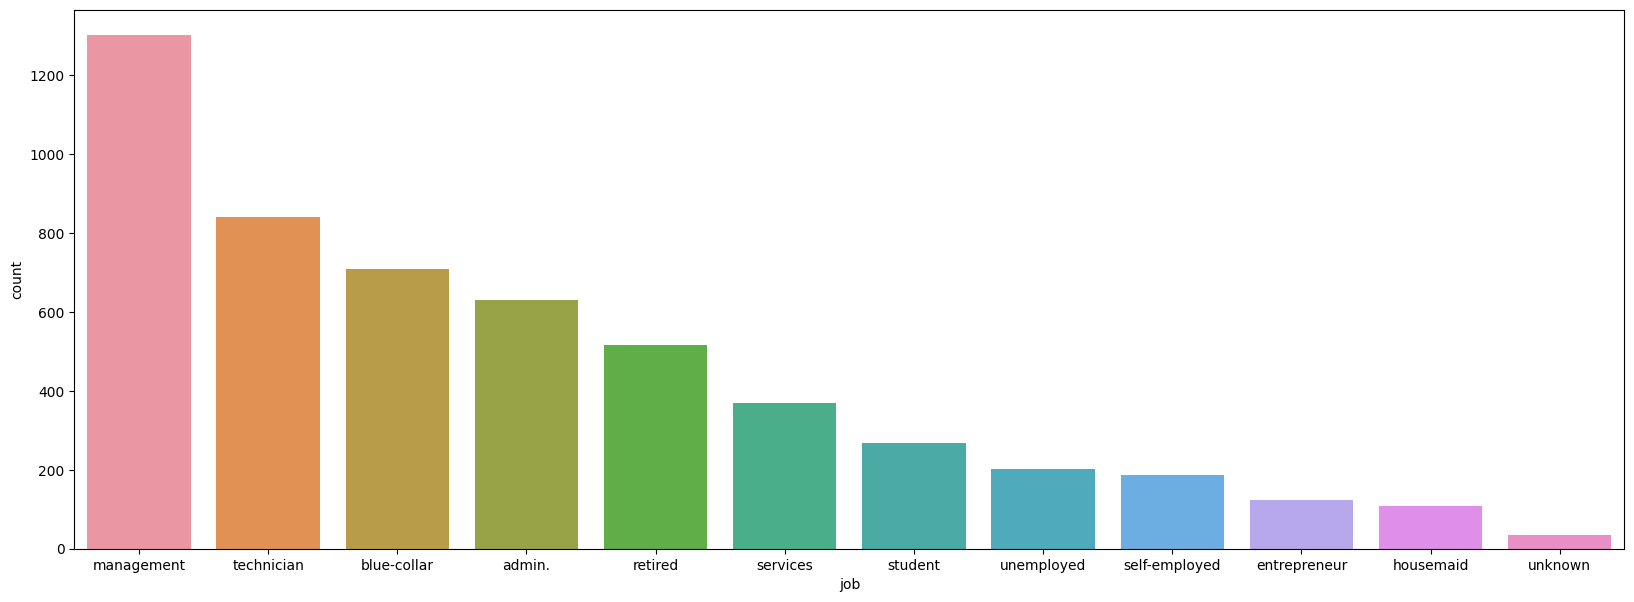

In [154]:
plt.figure(figsize=(20,7))
sns.countplot(x=yes_df.job,order=yes_df.job.value_counts().index)

<AxesSubplot: xlabel='marital', ylabel='count'>

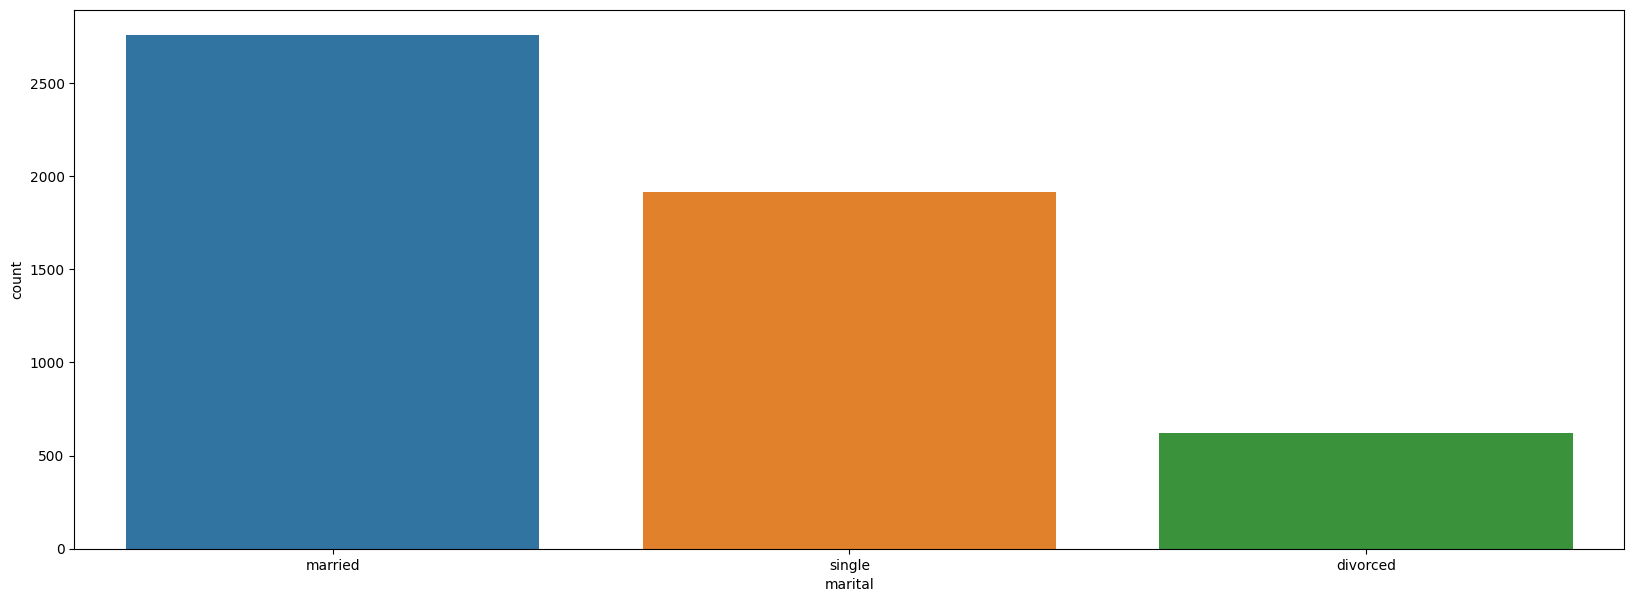

In [155]:
plt.figure(figsize=(20,7))
sns.countplot(x=yes_df.marital,order=yes_df.marital.value_counts().index)

<AxesSubplot: xlabel='education_qual', ylabel='count'>

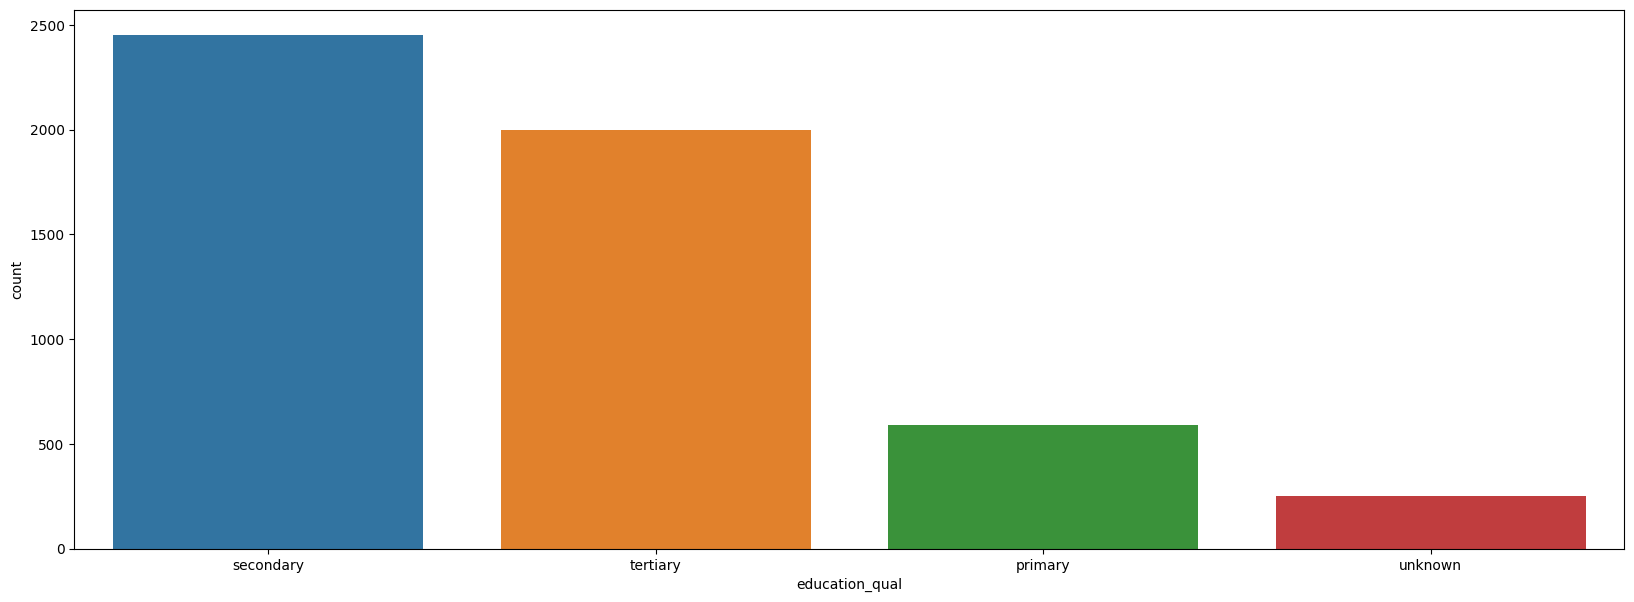

In [156]:
plt.figure(figsize=(20,7))
sns.countplot(x=yes_df.education_qual,order=yes_df.education_qual.value_counts().index)

<AxesSubplot: xlabel='prev_outcome', ylabel='count'>

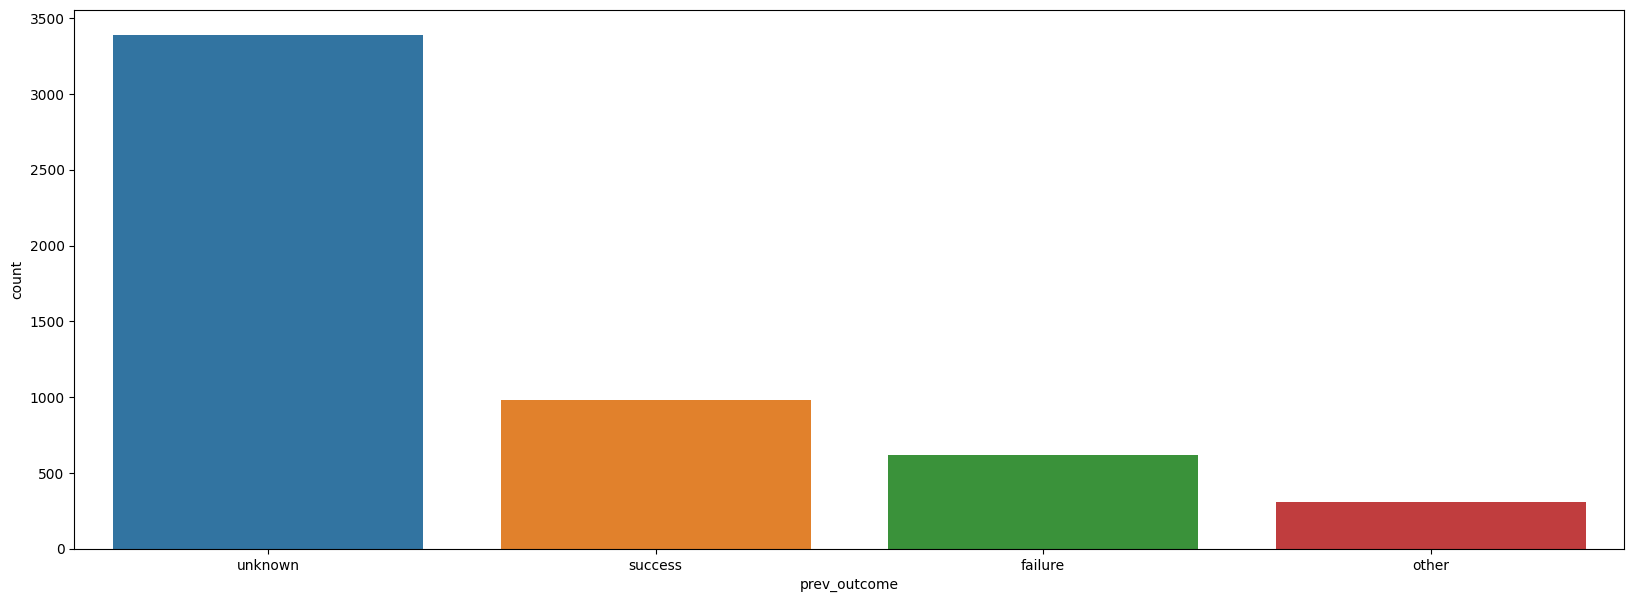

In [157]:
plt.figure(figsize=(20,7))
sns.countplot(x=yes_df.prev_outcome,order=yes_df.prev_outcome.value_counts().index)

<AxesSubplot: xlabel='day', ylabel='count'>

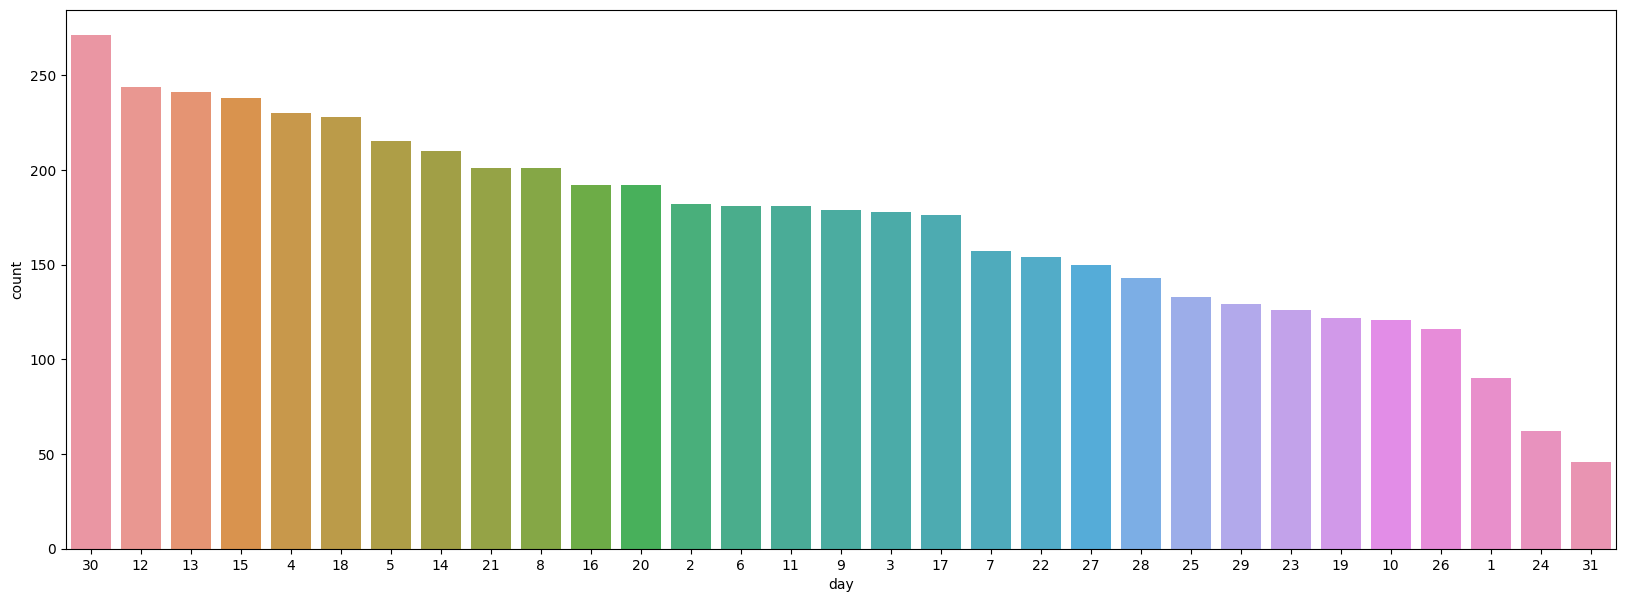

In [158]:
plt.figure(figsize=(20,7))
sns.countplot(x=yes_df.day,order=yes_df.day.value_counts().index)

<AxesSubplot: xlabel='mon', ylabel='count'>

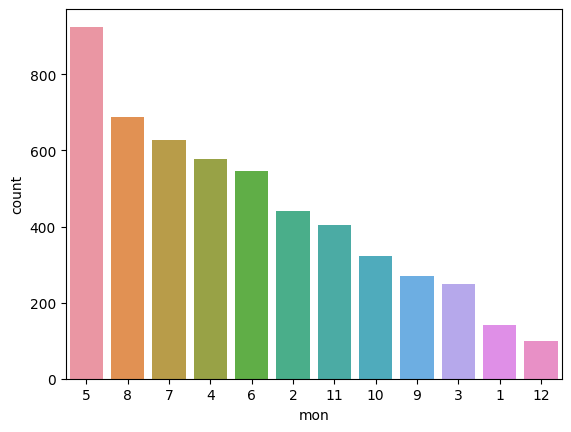

In [159]:
sns.countplot(x=yes_df.mon,order=yes_df.mon.value_counts().index)

In [160]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,5,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,5,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,5,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,5,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,5,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,11,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,11,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,11,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,11,508,4,unknown,no


In [161]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['y'] = le.fit_transform(df['y'])

In [162]:
x = df.drop(['y'],axis=1)
y = df[['y']]

In [163]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [164]:
x_train.shape,x_test.shape

((31647, 10), (13564, 10))

In [165]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(transformers=[
    ('tnf1',OrdinalEncoder(categories=[['unknown','housemaid','entrepreneur','self-employed','unemployed','student','services','retired','admin.','blue-collar','technician','management']]),['job']),
    ('tnf2',OrdinalEncoder(categories=[['divorced', 'single', 'married']]),['marital']),
    ('tnf3',OrdinalEncoder(categories=[['primary', 'unknown', 'secondary', 'tertiary']]),['education_qual']),
    ('tnf4',OrdinalEncoder(categories=[['unknown', 'cellular', 'telephone']]),['call_type']),
    ('tnf5',OrdinalEncoder(categories=[['unknown', 'failure', 'other', 'success']]),['prev_outcome'])
],remainder='passthrough')

In [107]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(transformers=[
    ('tf1',OneHotEncoder(sparse=False,drop='first'),['job','marital','education_qual','call_type','prev_outcome'])
],remainder='passthrough')

In [166]:
x_train = transformer.fit_transform(x_train)
x_test = transformer.transform(x_test)

In [167]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
s_x_train,s_y_train = smote.fit_resample(x_train,y_train)

In [168]:
s_x_train.shape,s_y_train.shape

((55864, 10), (55864, 1))

In [169]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(s_x_train,s_y_train)

C:\Users\saina\AppData\Local\Temp\ipykernel_4552\1015858210.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(s_x_train,s_y_train)


RandomForestClassifier()

In [170]:
model.score(s_x_train,s_y_train),model.score(x_test,y_test)

(1.0, 0.9031996461220879)

In [171]:
y_predict = model.predict(x_test)

In [172]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict)
cm

array([[11504,   486],
       [  827,   747]], dtype=int64)

In [173]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_predict)

0.717026630620816

In [174]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(s_x_train,s_y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [175]:
model.score(s_x_train,s_y_train),model.score(x_test,y_test)

(0.9681548045252757, 0.9093187850191684)

In [176]:
y_predict = model.predict(x_test)

In [177]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict)
cm

array([[11525,   465],
       [  765,   809]], dtype=int64)

In [178]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_predict)

0.7375974048683093